The goal of this project is to get practice getting and cleaning data with an API. I am drawing heavily from [this lesson at Real Python](https://realpython.com/python-api/). I also want to explore this data to understand what questions I could ask about Turkey and vegetable harvesting. If the monthly data looks good, I could ask questions about the holidays. If it doesn't, I'll have to focus on yearly. 

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("vegetables/vegetables.csv")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513645 entries, 0 to 4513644
Data columns (total 40 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   source_desc            object 
 1   county_ansi            float64
 2   asd_desc               object 
 3   load_time              object 
 4   commodity_desc         object 
 5   prodn_practice_desc    object 
 6   asd_code               float64
 7   reference_period_desc  object 
 8   util_practice_desc     object 
 9   country_code           float64
 10  week_ending            object 
 11  year                   float64
 12  unit_desc              object 
 13  sector_desc            object 
 14  location_desc          object 
 15  Value                  object 
 16  domain_desc            object 
 17  state_fips_code        float64
 18  end_code               float64
 19  state_name             object 
 20  freq_desc              object 
 21  group_desc             object 
 22  class_desc        

In [18]:
df.head()

,source_desc,county_ansi,asd_desc,load_time,commodity_desc,prodn_practice_desc,asd_code,reference_period_desc,util_practice_desc,country_code,week_ending,year,unit_desc,sector_desc,location_desc,Value,domain_desc,state_fips_code,end_code,state_name,freq_desc,group_desc,class_desc,state_ansi,watershed_desc,zip_5,agg_level_desc,congr_district_code,county_name,region_desc,CV (%),statisticcat_desc,state_alpha,county_code,domaincat_desc,short_desc,country_name,watershed_code,begin_code,error
0,SURVEY,NaN,NaN,2015-07-24 15:04:27.000,FOOD FISH,ALL PRODUCTION PRACTICES,NaN,YEAR,ALL UTILIZATION PRACTICES,9000.0,NaN,2010.0,$,ANIMALS & PRODUCTS,ALABAMA,"107,459,000",TOTAL,1.0,0.0,ALABAMA,ANNUAL,AQUACULTURE,CATFISH,1.0,NaN,NaN,STATE,NaN,NaN,NaN,NaN,SALES,AL,NaN,NOT SPECIFIED,"FOOD FISH, CATFISH - SALES, MEASURED IN $",UNITED STATES,0.0,0.0,NaN
1,SURVEY,NaN,NaN,2015-07-24 15:04:27.000,FOOD FISH,"WATER, TAKEN OUT OF PRODUCTION",NaN,JUL THRU DEC,ALL UTILIZATION PRACTICES,9000.0,NaN,2010.0,ACRES,ANIMALS & PRODUCTS,ALABAMA,870,TOTAL,1.0,12.0,ALABAMA,MONTHLY,AQUACULTURE,CATFISH,1.0,NaN,NaN,STATE,NaN,NaN,NaN,NaN,AREA OF WATER,AL,NaN,NOT SPECIFIED,"FOOD FISH, CATFISH, WATER, TAKEN OUT OF PRODUC...",UNITED STATES,0.0,7.0,NaN
2,SURVEY,NaN,NaN,2015-07-24 15:04:27.000,FOOD FISH,ALL PRODUCTION PRACTICES,NaN,YEAR,ALL UTILIZATION PRACTICES,9000.0,NaN,2010.0,$ / LB,ANIMALS & PRODUCTS,ALABAMA,(D),TOTAL,1.0,0.0,ALABAMA,ANNUAL,AQUACULTURE,"CATFISH, BROODSTOCK",1.0,NaN,NaN,STATE,NaN,NaN,NaN,NaN,PRICE RECEIVED,AL,NaN,NOT SPECIFIED,"FOOD FISH, CATFISH, BROODSTOCK - PRICE RECEIVE...",UNITED STATES,0.0,0.0,NaN
3,SURVEY,NaN,NaN,2015-07-24 15:04:27.000,FOOD FISH,ALL PRODUCTION PRACTICES,NaN,YEAR,ALL UTILIZATION PRACTICES,9000.0,NaN,2010.0,$,ANIMALS & PRODUCTS,ALABAMA,(D),TOTAL,1.0,0.0,ALABAMA,ANNUAL,AQUACULTURE,"CATFISH, BROODSTOCK",1.0,NaN,NaN,STATE,NaN,NaN,NaN,NaN,SALES,AL,NaN,NOT SPECIFIED,"FOOD FISH, CATFISH, BROODSTOCK - SALES, MEASUR...",UNITED STATES,0.0,0.0,NaN
4,SURVEY,NaN,NaN,2015-07-24 15:04:27.000,FOOD FISH,ALL PRODUCTION PRACTICES,NaN,YEAR,ALL UTILIZATION PRACTICES,9000.0,NaN,2010.0,HEAD,ANIMALS & PRODUCTS,ALABAMA,(D),TOTAL,1.0,0.0,ALABAMA,ANNUAL,AQUACULTURE,"CATFISH, BROODSTOCK",1.0,NaN,NaN,STATE,NaN,NaN,NaN,NaN,SALES,AL,NaN,NOT SPECIFIED,"FOOD FISH, CATFISH, BROODSTOCK - SALES, MEASUR...",UNITED STATES,0.0,0.0,NaN


1. What are all the values of the variables of interest?
https://www.nass.usda.gov/

In [19]:
df['commodity_desc'].unique()

array(['FOOD FISH', 'DAIRY PRODUCT TOTALS', 'ICE CREAM', 'MILK', 'CATTLE',
       'GOATS', 'HOGS', 'RED MEAT', 'SHEEP', 'CHICKENS', 'EGGS', 'BISON',
       'HONEY', 'CROP TOTALS', 'FIELDWORK', 'SOIL', 'BARLEY', 'CORN',
       'COTTON', 'FIELD CROP TOTALS', 'GRAIN STORAGE CAPACITY', 'HAY',
       'HAY & HAYLAGE', 'OATS', 'PASTURELAND', 'PEANUTS', 'SORGHUM',
       'SOYBEANS', 'WHEAT', 'BLUEBERRIES', 'FRUIT & TREE NUT TOTALS',
       'PEACHES', 'PECANS', 'MELONS', 'SWEET CORN', 'SWEET POTATOES',
       'TOMATOES', 'VEGETABLE TOTALS', 'LABOR', 'RENT', 'AG LAND',
       'FARM OPERATIONS', 'ANIMAL TOTALS', 'VEGETABLES, OTHER',
       'COMMODITY TOTALS', nan, 'AQUACULTURE TOTALS', 'BAITFISH',
       'CRUSTACEANS', 'PRACTICES', 'SPORT FISH', 'WATER', 'CROPS, OTHER',
       'BEANS', 'SMALL GRAINS', 'BERRY TOTALS', 'ORCHARDS',
       'CUT CHRISTMAS TREES & SHORT TERM WOODY CROPS',
       'FLORICULTURE TOTALS', 'FOOD CROP TOTALS', 'HORTICULTURE TOTALS',
       'NURSERY TOTALS', 'PROPAGATIVE MATE

In [61]:
df_dairy = df.loc[df['commodity_desc'] == 'SWEET CORN']
df_dairy.short_desc.unique()

array(['SWEET CORN, FRESH MARKET - ACRES HARVESTED',
       'SWEET CORN, FRESH MARKET - ACRES PLANTED',
       'SWEET CORN, FRESH MARKET - PRICE RECEIVED, MEASURED IN $ / CWT',
       'SWEET CORN, FRESH MARKET - PRODUCTION, MEASURED IN $',
       'SWEET CORN, FRESH MARKET - PRODUCTION, MEASURED IN CWT',
       'SWEET CORN, FRESH MARKET - YIELD, MEASURED IN CWT / ACRE',
       'SWEET CORN, IRRIGATED - ACRES HARVESTED',
       'SWEET CORN, IRRIGATED - OPERATIONS WITH AREA HARVESTED',
       'SWEET CORN, IRRIGATED - WATER APPLIED, MEASURED IN ACRE FEET / ACRE',
       'SWEET CORN, IRRIGATED - YIELD, MEASURED IN CWT / ACRE',
       'SWEET CORN, NON-IRRIGATED - ACRES HARVESTED',
       'SWEET CORN, NON-IRRIGATED - OPERATIONS WITH AREA HARVESTED',
       'SWEET CORN, NON-IRRIGATED - YIELD, MEASURED IN CWT / ACRE',
       'SWEET CORN, IRRIGATED, CHEMIGATION - TREATED, MEASURED IN ACRES',
       'SWEET CORN, IRRIGATED, CHEMIGATION - OPERATIONS WITH TREATED',
       'SWEET CORN, ORGANIC - ACRES

In [20]:
df['statisticcat_desc'].unique()

array(['SALES', 'AREA OF WATER', 'PRICE RECEIVED', 'PRODUCTION',
       'FARM USE', 'FAT TEST', 'GROSS INCOME', 'MILKFAT', 'LOSS, DEATH',
       'CALF CROP', 'INVENTORY', 'SLAUGHTERED', 'INVENTORY, AVG',
       'SHIPMENTS IN', 'VALUE', 'LITTER RATE', 'PIG CROP', 'FARROWED',
       'LOSS, DEATH & RENDERED', 'SALES FOR SLAUGHTER', 'EGGS SET',
       'PLACEMENTS', 'BEING MOLTED', 'MOLT COMPLETED', 'RATE OF LAY',
       'CONDEMNED, POST-MORTEM, AIRSACCULITIS',
       'CONDEMNED, POST-MORTEM, ALL CAUSES',
       'CONDEMNED, POST-MORTEM, BRUISES',
       'CONDEMNED, POST-MORTEM, CADAVER',
       'CONDEMNED, POST-MORTEM, CONTAMINATION',
       'CONDEMNED, POST-MORTEM, LEUKOSIS',
       'CONDEMNED, POST-MORTEM, OTHER REASONS',
       'CONDEMNED, POST-MORTEM, OVERSCALD',
       'CONDEMNED, POST-MORTEM, SEPTICAEMIA',
       'CONDEMNED, POST-MORTEM, SYNOVITIS',
       'CONDEMNED, POST-MORTEM, TUMORS', 'CONDEMNED, POST-MORTEM',
       'STOCKS', 'DAYS SUITABLE', 'MOISTURE', 'AREA PLANTED',
       '

In [26]:
df.loc[df['statisticcat_desc'].str.contains('CONDEMNED', na=False)]

,source_desc,county_ansi,asd_desc,load_time,commodity_desc,prodn_practice_desc,asd_code,reference_period_desc,util_practice_desc,country_code,week_ending,year,unit_desc,sector_desc,location_desc,Value,domain_desc,state_fips_code,end_code,state_name,freq_desc,group_desc,class_desc,state_ansi,watershed_desc,zip_5,agg_level_desc,congr_district_code,county_name,region_desc,CV (%),statisticcat_desc,state_alpha,county_code,domaincat_desc,short_desc,country_name,watershed_code,begin_code,error
717,SURVEY,NaN,NaN,2012-01-01 00:00:00.000,CHICKENS,ALL PRODUCTION PRACTICES,NaN,YEAR,"SLAUGHTER, FI",9000.0,NaN,2010.0,HEAD,ANIMALS & PRODUCTS,ALABAMA,"417,113",TOTAL,1.0,0.0,ALABAMA,ANNUAL,POULTRY,YOUNG,1.0,NaN,NaN,STATE,NaN,NaN,NaN,NaN,"CONDEMNED, POST-MORTEM, AIRSACCULITIS",AL,NaN,NOT SPECIFIED,"CHICKENS, YOUNG, SLAUGHTER, FI - CONDEMNED, PO...",UNITED STATES,0.0,0.0,NaN
718,SURVEY,NaN,NaN,2012-01-01 00:00:00.000,CHICKENS,ALL PRODUCTION PRACTICES,NaN,JAN,"SLAUGHTER, FI",9000.0,NaN,2010.0,HEAD,ANIMALS & PRODUCTS,ALABAMA,"54,631",TOTAL,1.0,1.0,ALABAMA,MONTHLY,POULTRY,YOUNG,1.0,NaN,NaN,STATE,NaN,NaN,NaN,NaN,"CONDEMNED, POST-MORTEM, AIRSACCULITIS",AL,NaN,NOT SPECIFIED,"CHICKENS, YOUNG, SLAUGHTER, FI - CONDEMNED, PO...",UNITED STATES,0.0,1.0,NaN
719,SURVEY,NaN,NaN,2012-01-01 00:00:00.000,CHICKENS,ALL PRODUCTION PRACTICES,NaN,FEB,"SLAUGHTER, FI",9000.0,NaN,2010.0,HEAD,ANIMALS & PRODUCTS,ALABAMA,"53,925",TOTAL,1.0,2.0,ALABAMA,MONTHLY,POULTRY,YOUNG,1.0,NaN,NaN,STATE,NaN,NaN,NaN,NaN,"CONDEMNED, POST-MORTEM, AIRSACCULITIS",AL,NaN,NOT SPECIFIED,"CHICKENS, YOUNG, SLAUGHTER, FI - CONDEMNED, PO...",UNITED STATES,0.0,2.0,NaN
720,SURVEY,NaN,NaN,2012-01-01 00:00:00.000,CHICKENS,ALL PRODUCTION PRACTICES,NaN,MAR,"SLAUGHTER, FI",9000.0,NaN,2010.0,HEAD,ANIMALS & PRODUCTS,ALABAMA,"46,054",TOTAL,1.0,3.0,ALABAMA,MONTHLY,POULTRY,YOUNG,1.0,NaN,NaN,STATE,NaN,NaN,NaN,NaN,"CONDEMNED, POST-MORTEM, AIRSACCULITIS",AL,NaN,NOT SPECIFIED,"CHICKENS, YOUNG, SLAUGHTER, FI - CONDEMNED, PO...",UNITED STATES,0.0,3.0,NaN
721,SURVEY,NaN,NaN,2012-01-01 00:00:00.000,CHICKENS,ALL PRODUCTION PRACTICES,NaN,APR,"SLAUGHTER, FI",9000.0,NaN,2010.0,HEAD,ANIMALS & PRODUCTS,ALABAMA,"34,493",TOTAL,1.0,4.0,ALABAMA,MONTHLY,POULTRY,YOUNG,1.0,NaN,NaN,STATE,NaN,NaN,NaN,NaN,"CONDEMNED, POST-MORTEM, AIRSACCULITIS",AL,NaN,NOT SPECIFIED,"CHICKENS, YOUNG, SLAUGHTER, FI - CONDEMNED, PO...",UNITED STATES,0.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4443095,SURVEY,NaN,NaN,2022-08-25 14:47:12.000,TURKEYS,ALL PRODUCTION PRACTICES,NaN,JUN,"SLAUGHTER, FI, CARCASS & PARTS",9000.0,NaN,2022.0,PCT OF LB CERTIFIED & POST-MORTEM CONDEMNED,ANIMALS & PRODUCTS,WISCONSIN,1.76,TOTAL,55.0,6.0,WISCONSIN,MONTHLY,POULTRY,YOUNG,55.0,NaN,NaN,STATE,NaN,NaN,NaN,NaN,"CONDEMNED, POST-MORTEM",WI,NaN,NOT SPECIFIED,"TURKEYS, YOUNG, SLAUGHTER, FI, CARCASS & PARTS...",UNITED STATES,0.0,6.0,NaN
4443096,SURVEY,NaN,NaN,2022-09-23 15:00:00.000,TURKEYS,ALL PRODUCTION PRACTICES,NaN,JUL,"SLAUGHTER, FI, CARCASS & PARTS",9000.0,NaN,2022.0,PCT OF LB CERTIFIED & POST-MORTEM CONDEMNED,ANIMALS & PRODUCTS,WISCONSIN,1.900,TOTAL,55.0,7.0,WISCONSIN,MONTHLY,POULTRY,YOUNG,55.0,NaN,NaN,STATE,NaN,NaN,NaN,NaN,"CONDEMNED, POST-MORTEM",WI,NaN,NOT SPECIFIED,"TURKEYS, YOUNG, SLAUGHTER, FI, CARCASS & PARTS...",UNITED STATES,0.0,7.0,NaN
4443097,SURVEY,NaN,NaN,2022-10-24 15:00:00.000,TURKEYS,ALL PRODUCTION PRACTICES,NaN,AUG,"SLAUGHTER, FI, CARCASS & PARTS",9000.0,NaN,2022.0,PCT OF LB CERTIFIED & POST-MORTEM CONDEMNED,ANIMALS & PRODUCTS,WISCONSIN,1.75,TOTAL,55.0,8.0,WISCONSIN,MONTHLY,POULTRY,YOUNG,55.0,NaN,NaN,STATE,NaN,NaN,NaN,NaN,"CONDEMNED, POST-MORTEM",WI,NaN,NOT SPECIFIED,"TURKEYS, YOUNG, SLAUGHTER, FI, CARCASS & PARTS...",UNITED STATES,0.0,8.0,NaN
4443098,SURVEY,NaN,NaN,2022-11-22 15:00:00.000,TURKEYS,ALL PRODUCTION PRACTICES,NaN,SEP,"SLAUGHTER, FI, CARCASS & PARTS",9000.0,NaN,2022.0,PCT OF LB CERTIFIED & POST-MORTEM CONDEMNED,ANIMA

2. How much money is animal products?
3. How much money is lost to sickness?

4. How much money is fruits and veg?
5. How much money is lost to infestation?


In [58]:
df['group_desc'].unique()
poultry_df = df.loc[df['group_desc'] == 'POULTRY']
poultry_df_dollars = poultry_df.loc[(poultry_df['statisticcat_desc']=='SALES') & (poultry_df['unit_desc'] == '$')]
poultry_df_dollars.head()
poultry_df_dollars['Value']= pd.to_numeric(poultry_df_dollars['Value'], errors='coerce')
poultry_df_dollars['year'].astype('int32')
poultry_df_dollars['year'] = pd.to_datetime(poultry_df_dollars['year'], format='%Y', errors='coerce')
poultry_df_dollars.head()
poultry_df_dollars.to_csv("poultry_sales.csv", index=False)

C:\Users\miche\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\miche\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [48]:
poultry_df_dollars.head()

,source_desc,county_ansi,asd_desc,load_time,commodity_desc,prodn_practice_desc,asd_code,reference_period_desc,util_practice_desc,country_code,week_ending,year,unit_desc,sector_desc,location_desc,Value,domain_desc,state_fips_code,end_code,state_name,freq_desc,group_desc,class_desc,state_ansi,watershed_desc,zip_5,agg_level_desc,congr_district_code,county_name,region_desc,CV (%),statisticcat_desc,state_alpha,county_code,domaincat_desc,short_desc,country_name,watershed_code,begin_code,error
23899,CENSUS,NaN,NaN,2015-01-31 00:00:00.000,EGGS,ORGANIC,NaN,YEAR,ALL UTILIZATION PRACTICES,9000.0,NaN,2015.0,$,ANIMALS & PRODUCTS,ALABAMA,(D),ORGANIC STATUS,1.0,0.0,ALABAMA,ANNUAL,POULTRY,ALL CLASSES,1.0,NaN,NaN,STATE,NaN,NaN,NaN,(D),SALES,AL,NaN,ORGANIC STATUS: (NOP USDA CERTIFIED),"EGGS, ORGANIC - SALES, MEASURED IN $",UNITED STATES,0.0,0.0,NaN
80692,CENSUS,NaN,NaN,2015-01-31 00:00:00.000,EGGS,ORGANIC,NaN,YEAR,ALL UTILIZATION PRACTICES,9000.0,NaN,2014.0,$,ANIMALS & PRODUCTS,ALASKA,(D),ORGANIC STATUS,2.0,0.0,ALASKA,ANNUAL,POULTRY,ALL CLASSES,2.0,NaN,NaN,STATE,NaN,NaN,NaN,(D),SALES,AK,NaN,ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT),"EGGS, ORGANIC - SALES, MEASURED IN $",UNITED STATES,0.0,0.0,NaN
80693,CENSUS,NaN,NaN,2015-01-31 00:00:00.000,EGGS,ORGANIC,NaN,YEAR,ALL UTILIZATION PRACTICES,9000.0,NaN,2014.0,$,ANIMALS & PRODUCTS,ALASKA,(D),ORGANIC STATUS,2.0,0.0,ALASKA,ANNUAL,POULTRY,ALL CLASSES,2.0,NaN,NaN,STATE,NaN,NaN,NaN,(D),SALES,AK,NaN,ORGANIC STATUS: (NOP USDA EXEMPT),"EGGS, ORGANIC - SALES, MEASURED IN $",UNITED STATES,0.0,0.0,NaN
136131,CENSUS,NaN,NaN,2018-02-01 00:00:00.000,CHICKENS,ORGANIC,NaN,YEAR,ALL UTILIZATION PRACTICES,9000.0,NaN,2019.0,$,ANIMALS & PRODUCTS,ARIZONA,(D),ORGANIC STATUS,4.0,0.0,ARIZONA,ANNUAL,POULTRY,LAYERS,4.0,NaN,NaN,STATE,NaN,NaN,NaN,(D),SALES,AZ,NaN,ORGANIC STATUS: (NOP USDA CERTIFIED),"CHICKENS, LAYERS, ORGANIC - SALES, MEASURED IN $",UNITED STATES,0.0,0.0,NaN
136134,CENSUS,NaN,NaN,2018-02-01 00:00:00.000,EGGS,ORGANIC,NaN,YEAR,ALL UTILIZATION PRACTICES,9000.0,NaN,2019.0,$,ANIMALS & PRODUCTS,ARIZONA,(D),ORGANIC STATUS,4.0,0.0,ARIZONA,ANNUAL,POULTRY,ALL CLASSES,4.0,NaN,NaN,STATE,NaN,NaN,NaN,(D),SALES,AZ,NaN,ORGANIC STATUS: (NOP USDA CERTIFIED),"EGGS, ORGANIC - SALES, MEASURED IN $",UNITED STATES,0.0,0.0,NaN


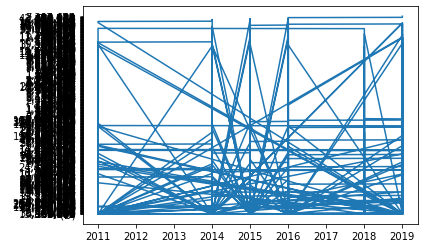

In [27]:
animal_df = df.loc[df['sector_desc'].str.contains('ANIMALS', na=False)]
animal_df.head()

,source_desc,county_ansi,asd_desc,load_time,commodity_desc,prodn_practice_desc,asd_code,reference_period_desc,util_practice_desc,country_code,week_ending,year,unit_desc,sector_desc,location_desc,Value,domain_desc,state_fips_code,end_code,state_name,freq_desc,group_desc,class_desc,state_ansi,watershed_desc,zip_5,agg_level_desc,congr_district_code,county_name,region_desc,CV (%),statisticcat_desc,state_alpha,county_code,domaincat_desc,short_desc,country_name,watershed_code,begin_code,error
0,SURVEY,NaN,NaN,2015-07-24 15:04:27.000,FOOD FISH,ALL PRODUCTION PRACTICES,NaN,YEAR,ALL UTILIZATION PRACTICES,9000.0,NaN,2010.0,$,ANIMALS & PRODUCTS,ALABAMA,"107,459,000",TOTAL,1.0,0.0,ALABAMA,ANNUAL,AQUACULTURE,CATFISH,1.0,NaN,NaN,STATE,NaN,NaN,NaN,NaN,SALES,AL,NaN,NOT SPECIFIED,"FOOD FISH, CATFISH - SALES, MEASURED IN $",UNITED STATES,0.0,0.0,NaN
1,SURVEY,NaN,NaN,2015-07-24 15:04:27.000,FOOD FISH,"WATER, TAKEN OUT OF PRODUCTION",NaN,JUL THRU DEC,ALL UTILIZATION PRACTICES,9000.0,NaN,2010.0,ACRES,ANIMALS & PRODUCTS,ALABAMA,870,TOTAL,1.0,12.0,ALABAMA,MONTHLY,AQUACULTURE,CATFISH,1.0,NaN,NaN,STATE,NaN,NaN,NaN,NaN,AREA OF WATER,AL,NaN,NOT SPECIFIED,"FOOD FISH, CATFISH, WATER, TAKEN OUT OF PRODUC...",UNITED STATES,0.0,7.0,NaN
2,SURVEY,NaN,NaN,2015-07-24 15:04:27.000,FOOD FISH,ALL PRODUCTION PRACTICES,NaN,YEAR,ALL UTILIZATION PRACTICES,9000.0,NaN,2010.0,$ / LB,ANIMALS & PRODUCTS,ALABAMA,(D),TOTAL,1.0,0.0,ALABAMA,ANNUAL,AQUACULTURE,"CATFISH, BROODSTOCK",1.0,NaN,NaN,STATE,NaN,NaN,NaN,NaN,PRICE RECEIVED,AL,NaN,NOT SPECIFIED,"FOOD FISH, CATFISH, BROODSTOCK - PRICE RECEIVE...",UNITED STATES,0.0,0.0,NaN
3,SURVEY,NaN,NaN,2015-07-24 15:04:27.000,FOOD FISH,ALL PRODUCTION PRACTICES,NaN,YEAR,ALL UTILIZATION PRACTICES,9000.0,NaN,2010.0,$,ANIMALS & PRODUCTS,ALABAMA,(D),TOTAL,1.0,0.0,ALABAMA,ANNUAL,AQUACULTURE,"CATFISH, BROODSTOCK",1.0,NaN,NaN,STATE,NaN,NaN,NaN,NaN,SALES,AL,NaN,NOT SPECIFIED,"FOOD FISH, CATFISH, BROODSTOCK - SALES, MEASUR...",UNITED STATES,0.0,0.0,NaN
4,SURVEY,NaN,NaN,2015-07-24 15:04:27.000,FOOD FISH,ALL PRODUCTION PRACTICES,NaN,YEAR,ALL UTILIZATION PRACTICES,9000.0,NaN,2010.0,HEAD,ANIMALS & PRODUCTS,ALABAMA,(D),TOTAL,1.0,0.0,ALABAMA,ANNUAL,AQUACULTURE,"CATFISH, BROODSTOCK",1.0,NaN,NaN,STATE,NaN,NaN,NaN,NaN,SALES,AL,NaN,NOT SPECIFIED,"FOOD FISH, CATFISH, BROODSTOCK - SALES, MEASUR...",UNITED STATES,0.0,0.0,NaN


In [28]:
animal_df['statisticcat_desc'].unique()

array(['SALES', 'AREA OF WATER', 'PRICE RECEIVED', 'PRODUCTION',
       'FARM USE', 'FAT TEST', 'GROSS INCOME', 'MILKFAT', 'LOSS, DEATH',
       'CALF CROP', 'INVENTORY', 'SLAUGHTERED', 'INVENTORY, AVG',
       'SHIPMENTS IN', 'VALUE', 'LITTER RATE', 'PIG CROP', 'FARROWED',
       'LOSS, DEATH & RENDERED', 'SALES FOR SLAUGHTER', 'EGGS SET',
       'PLACEMENTS', 'BEING MOLTED', 'MOLT COMPLETED', 'RATE OF LAY',
       'CONDEMNED, POST-MORTEM, AIRSACCULITIS',
       'CONDEMNED, POST-MORTEM, ALL CAUSES',
       'CONDEMNED, POST-MORTEM, BRUISES',
       'CONDEMNED, POST-MORTEM, CADAVER',
       'CONDEMNED, POST-MORTEM, CONTAMINATION',
       'CONDEMNED, POST-MORTEM, LEUKOSIS',
       'CONDEMNED, POST-MORTEM, OTHER REASONS',
       'CONDEMNED, POST-MORTEM, OVERSCALD',
       'CONDEMNED, POST-MORTEM, SEPTICAEMIA',
       'CONDEMNED, POST-MORTEM, SYNOVITIS',
       'CONDEMNED, POST-MORTEM, TUMORS', 'CONDEMNED, POST-MORTEM',
       'STOCKS', 'SALES IN ORGANIC MARKETS', 'INVENTORY, PEAK',
      

In [32]:
animal_df.loc[df['statisticcat_desc'].str.contains('SALES', na=False)]['class_desc'].unique()

array(['CATFISH', 'CATFISH, BROODSTOCK', 'CATFISH, FINGERLINGS & FRY',
       'CATFISH, FOODSIZE', 'CATFISH, STOCKERS', 'ALL CLASSES',
       'FLUID GRADE', '(EXCL CALVES)', 'CALVES', 'INCL CALVES',
       '(EXCL BROILERS)', 'ANIMALS ONLY', 'PRODUCTS ONLY', '(EXCL COWS)',
       'COWS, MILK', 'CRAWFISH', 'OTHER SPECIES', 'CRAWFISH, FOR FOOD',
       'SHRIMP, SALTWATER', 'BASS, HYBRID STRIPED', 'CARP',
       'CARP, (EXCL GRASS)', 'CARP, GRASS', 'FLOUNDER', 'TILAPIA',
       'TROUT', 'TROUT, FOODSIZE', 'BASS, LARGEMOUTH', 'CRAPPIE',
       'SUNFISH', 'COWS, BEEF', 'TURTLES', 'TURTLES, WHOLE',
       'MINNOWS, FATHEAD', 'SHINERS, GOLDEN', 'OYSTERS',
       'OYSTERS, EASTERN', 'KOI', 'CLAMS', 'CLAMS, GEODUCK', 'MUSSELS',
       'OYSTERS, PACIFIC', 'CLAMS, HARD', '(EXCL LAMBS)', 'INCL LAMBS',
       'LAMBS', 'ALGAE', 'ALGAE, MICROALGAE', 'TROUT, STOCKERS', 'LAYERS',
       'GOLDFISH, FEEDER & BAIT', 'PERCH, YELLOW',
       'FRESHWATER, EGG LAYERS', 'FRESHWATER, LIVE BEARERS', 'GOLDFISH',
 